In [1]:
import pandas as pd
import numpy as np
import nltk
import glob
import os
import re

In [2]:
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
word_tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

In [3]:
#Load data
data_folder = r"./"
files = sorted(glob.glob(os.path.join(data_folder, "*.txt")))
books = []
for fn in files:
	with open(fn, 'r', encoding='utf8') as f:
		books.append(f.read().lower().replace("\xa0", " ").replace("\n", " ").replace("\ufeff", " "))
all_text = ' '.join(books)

In [5]:
smartStopWords = {}

In [6]:
smartStopWords = open('smartstop.txt', 'r').read().splitlines()

In [7]:
for novel in books:
    yankee = books[0]
    dubliners = books[1]
    heart_dark = books[2]
    huck_finn = books[3]
    iliad = books[4]
    lord_jim = books[5]
    mansfield = books[6]
    mississippi = books[7]
    northanger = books[8]
    nostromo = books [9]
    odyssey = books[10]
    persuasion = books[11]
    portrait = books[12]
    pride_prej = books[13]
    prince_paup = books[14]
    secret_agent = books[15]
    sense_bility = books[16]
    tom_sawyer = books[17]
    tramp = books[18]
    ulysses = books[19]

In [8]:
austen = [mansfield, northanger, persuasion, pride_prej, sense_bility]
conrad = [heart_dark, lord_jim, nostromo, secret_agent]
homer = [iliad, odyssey]
joyce = [dubliners, portrait, ulysses]
twain = [yankee, huck_finn, mississippi, prince_paup, tom_sawyer, tramp]

In [9]:
authors = [austen, conrad, homer, joyce, twain]

In [10]:
contents = re.sub('\'s|(\r\n)|-+|["_]', ' ', all_text)

In [11]:
sen_list = nltk.tokenize.sent_tokenize(contents.strip())

In [12]:
word_list = nltk.tokenize.word_tokenize(contents.strip())

In [13]:
f_dist = nltk.FreqDist(word_list)
vocab = list(f_dist.keys())

Individual Author Analysis

In [14]:
joyce_text = ' '.join(joyce).replace("\x80\x9d", " ").replace("\x80\x9c", " ").replace("\x80\x99", " ")

In [15]:
joyce_contents = re.sub('\'s|(\r\n)|-+|["_]', ' ', joyce_text)

In [16]:
joyce_sen_list = nltk.tokenize.sent_tokenize(joyce_contents.strip())

In [17]:
joyce_word_list = nltk.tokenize.word_tokenize(joyce_contents.strip())

In [18]:
f_dist = nltk.FreqDist(joyce_word_list)
f_dist.most_common(10)

[('the', 18500),
 (',', 16774),
 ('.', 13912),
 ('and', 11134),
 ('of', 9004),
 ('a', 7575),
 ('to', 7055),
 ('in', 5014),
 ('he', 4916),
 ('was', 4163)]

In [19]:
cleanWords = []
senLenDist = []
pronDist = []
conjDist = []
sentences = []
totalWords = 0
wordLenDist = []
totalSyllables = 0

In [20]:
for sentence in joyce_sen_list:
    if sentence != ".":
        pronCount = 0
        conjCount = 0
        sentences.append(sentence)
        sentenceWords = re.findall(r"[\w']+", sentence)
        totalWords += len(sentenceWords)
        senLenDist.append(len(sentenceWords))
        for word in sentenceWords:
                if word not in smartStopWords:
                    cleanWords.append(word)

In [21]:
totalWords

292065

In [22]:
f_dist_clean = nltk.FreqDist(cleanWords)
f_dist_clean.most_common(10)

[('mr', 768),
 ('man', 586),
 ('time', 519),
 ('stephen', 438),
 ('made', 429),
 ('good', 419),
 ('back', 326),
 ('day', 321),
 ('eyes', 308),
 ('long', 305)]

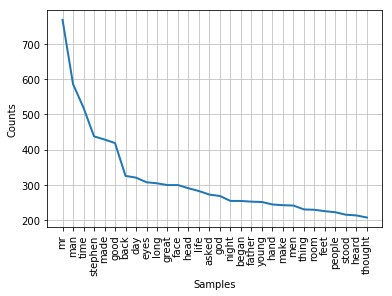

In [28]:
f_dist_clean.plot(30, cumulative=False)